### Load modules

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Load dataset

In [ ]:
df = pd.read_csv('../input/severstal-steel-defect-detection/train.csv')
df

### 원본 이미지 및 결함 이미지를 불러오는 함수를 정의합니다.

In [ ]:
def load(image_id):
    """
    Steel Defect Detection 수행을 위해서 원본 이미지(철판)와 결함 이미지를 불러옵니다.
    """
    
    # 원본 이미지가 저장된 폴더의 위치를 정의한다.
    path = '../input/severstal-steel-defect-detection/train_images/'
    
    # 원본 이미지를 불러온다.
    image = plt.imread(path + image_id)
    
    # 결함 이미지를 생성한다.
    label = np.zeros(256 * 1600)
    
    where = df['ImageId'] == image_id

    # DataFrame의 각 행별로 반복 실행한다.
    for idx, (image_id, class_id, pixels) in df[where].iterrows():

        pixels = pixels.split()               # 공백단위로 분리
        pixels = np.array(pixels, dtype=int)  # 넘파이 어레이로 변환
        pixels = pixels.reshape(-1, 2)        # n X 2 의 행렬로 변환

        # 결함 정보(시작점 및 길이)에 따라서 결함 부분에 결함 종류를 기입합니다.
        for start, length in pixels:
            label[start:start + length] = class_id

    # 결함 정보를 원본 이미지와 같은 Shape로 치환 합니다.
    label = label.reshape(256, 1600, order='F')
    
    return image, label

In [ ]:
image_id = df.sample()['ImageId'].values[0]
image, label = load(image_id)
plt.imshow(image)
plt.show()
plt.imshow(label)
plt.show()

### Custom Metric

$$
{\displaystyle F_{1}={\frac {2}{\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}}=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}={\frac {\mathrm {t} p}{\mathrm {tp} +{\frac {1}{2}}(\mathrm {fp} +\mathrm {fn} )}}}.
$$

In [ ]:
def f1_score(y_true, y_pred, c):
    
    y_pred = tf.argmax(y_pred, axis=-1)

    pred = tf.cast(y_pred == c, dtype=tf.float32)
    true = tf.cast(y_true == c, dtype=tf.float32)

    tp = tf.reduce_sum(pred * true)
    fp = tf.reduce_sum(pred * (1 - true))
    fn = tf.reduce_sum((1 - pred) * true)

    return tp / (tp + 0.5 * (fp + fn))


def f1_0(y_true, y_pred):
    return f1_score(y_true, y_pred, 0)

def f1_1(y_true, y_pred):
    return f1_score(y_true, y_pred, 1)

def f1_2(y_true, y_pred):
    return f1_score(y_true, y_pred, 2)

def f1_3(y_true, y_pred):
    return f1_score(y_true, y_pred, 3)

def f1_4(y_true, y_pred):
    return f1_score(y_true, y_pred, 4)

### FCN

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Input((256, 1600, 3)),
    tf.keras.layers.Conv2D(16, (5, 5), strides=2, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (5, 5), strides=2, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5, 5), strides=2, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.UpSampling2D(8),
    tf.keras.layers.Conv2D(5, (5, 5), padding='same', activation='softmax'),
])
metrics = [f1_0, f1_1, f1_2, f1_3, f1_4]
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=metrics, loss_weights=[0.001, 1, 1, 1, 1])
model.summary()

### U-Net

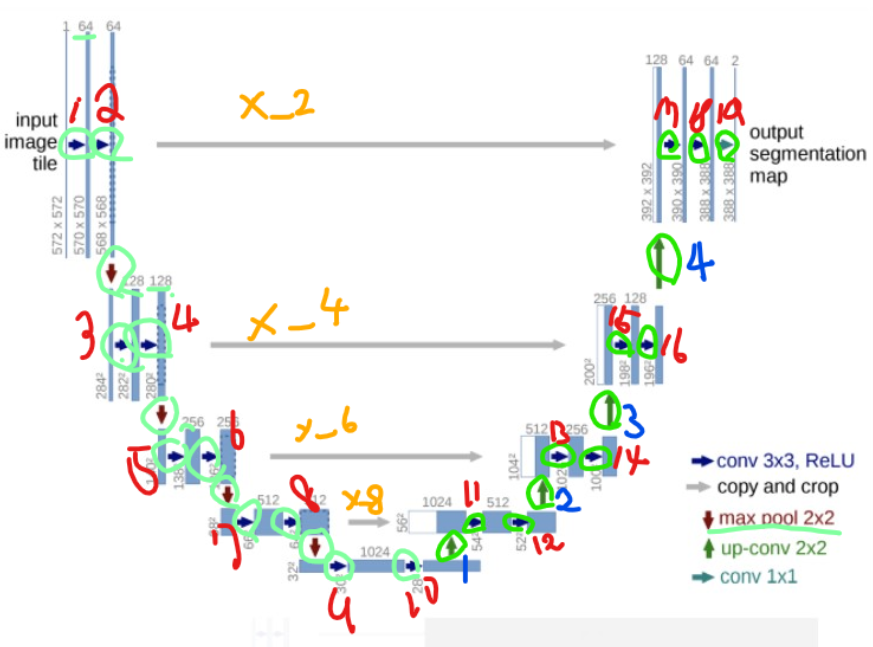

In [ ]:
class UNet(tf.keras.Model):
    
    def __init__(self):
        super(UNet, self).__init__()
        
        # Pooling Layers.
        self.maxpool = tf.keras.layers.MaxPool2D()
        
        # Convolution Layers.
        self.conv1 = tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu')
        self.conv3 = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')
        self.conv4 = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')
        self.conv5 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv6 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv7 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv8 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv9 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')
        self.conv10 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')
        self.conv11 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv12 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv13 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv14 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv15 = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')
        self.conv16 = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')
        self.conv17 = tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu')
        self.conv18 = tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu')

        # Transposed Convolution Layers.
        self.upconv1 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=2, padding='same', activation='relu')
        self.upconv2 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=2, padding='same', activation='relu')
        self.upconv3 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=2, padding='same', activation='relu')
        self.upconv4 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=2, padding='same', activation='relu')
        self.upconv5 = tf.keras.layers.Conv2DTranspose(5, (2, 2), strides=2, padding='same', activation='softmax')
        
        # Batch Normalization Layers.
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.bn3 = tf.keras.layers.BatchNormalization()
        self.bn4 = tf.keras.layers.BatchNormalization()
        self.bn5 = tf.keras.layers.BatchNormalization()
        self.bn6 = tf.keras.layers.BatchNormalization()
        self.bn7 = tf.keras.layers.BatchNormalization()
        self.bn8 = tf.keras.layers.BatchNormalization()
        self.bn9 = tf.keras.layers.BatchNormalization()
        self.bn10 = tf.keras.layers.BatchNormalization()
        self.bn11 = tf.keras.layers.BatchNormalization()
        self.bn12 = tf.keras.layers.BatchNormalization()
        self.bn13 = tf.keras.layers.BatchNormalization()
        self.bn14 = tf.keras.layers.BatchNormalization()
        self.bn15 = tf.keras.layers.BatchNormalization()
        self.bn16 = tf.keras.layers.BatchNormalization()
        self.bn17 = tf.keras.layers.BatchNormalization()
        self.bn18 = tf.keras.layers.BatchNormalization()
        
    def call(self, x, training=False):
        
        x = x / 255
        
        x = self.bn1(self.conv1(x), training)
        x = self.bn2(self.conv2(x), training)
        x_2 = x
        
        x = self.maxpool(x)
        x = self.bn3(self.conv3(x), training)
        x = self.bn4(self.conv4(x), training)
        x_4 = x
        
        x = self.maxpool(x)
        x = self.bn5(self.conv5(x), training)
        x = self.bn6(self.conv6(x), training)
        x_6 = x
        
        x = self.maxpool(x)
        x = self.bn7(self.conv7(x), training)
        x = self.bn8(self.conv8(x), training)
        x_8 = x
        
        x = self.maxpool(x)
        x = self.bn9(self.conv9(x), training)
        x = self.bn10(self.conv10(x), training)
        
        x = self.upconv1(x)
        x = tf.concat([x, x_8], axis=-1)

        x = self.bn11(self.conv11(x), training)
        x = self.bn12(self.conv12(x), training)
        
        x = self.upconv2(x)
        x = tf.concat([x, x_6], axis=-1)
        
        x = self.bn13(self.conv13(x), training)
        x = self.bn14(self.conv14(x), training)
        
        x = self.upconv3(x)
        x = tf.concat([x, x_4], axis=-1)
        
        x = self.bn15(self.conv15(x), training)
        x = self.bn16(self.conv16(x), training)
        
        x = self.upconv4(x)
        x = tf.concat([x, x_2], axis=-1)
        
        x = self.bn17(self.conv17(x), training)
        x = self.bn18(self.conv18(x), training)
        
        x = self.upconv5(x)
        
        return x


tf.keras.backend.clear_session()
model = UNet()
metrics = [f1_0, f1_1, f1_2, f1_3, f1_4]
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=metrics, loss_weights=[0.0001, 1, 1, 1, 1])
model.build(input_shape=(None, 128, 800, 3))
model.summary()
model(np.random.randn(10, 128, 800, 3)).shape

### Training

In [ ]:
# Train/Valid split

ids = df['ImageId']          # 인덱스만 가져오기
ids = ids.drop_duplicates()  # 중복 제거

ids_train = ids.sample(frac=0.8)
ids_valid = ids.drop(index=ids_train.index)

In [ ]:
def gen(ids, batch_size):

    ids = ids.values             # Pandas에서 Numpy로 변경
    
    while True:

        # 이미지 아이디를 셔플 합니다.
        np.random.shuffle(ids)

        for i in range(0, ids.shape[0], batch_size):

            images = []  # 원본 이미지 담을 버퍼
            labels = []  # 결함 이미지 담을 버퍼

            for image_id in ids[i:i + batch_size]:     # 현재 미니 배치의 첫번째 부터 끝까지 반복
                image, label = load(image_id)          # image.shape == (256, 1600, 3) / label.shape == (256, 1600)
                image = cv2.resize(image, (800, 128))  # image.shape == (128, 800) => GPU Memory 아끼기 위해서 절반으로 축소
                images.append(image)
                labels.append(label)

            images = np.array(images, copy=False)    # shape == (batch_size, 128, 800)
            labels = np.array(labels, copy=False)    # shape == (batch_size, 256, 1600)

            yield images, labels

In [ ]:
hist = model.fit(
    # train dataset generator.
    gen(ids_train, 64),
    # valid dataset generator.
    validation_data = gen(ids_valid, 128),
    # number of steps for train set.
    steps_per_epoch = np.ceil(ids_train.shape[0] / 64).astype('int'),
    # number of steps for valid set.
    validation_steps = np.ceil(ids_valid.shape[0] / 128).astype('int'),
    # number of epochs.
    epochs = 10
)

In [ ]:
plt.title('F1 Score for each classes in validation set')
plt.plot(hist.history['val_f1_0'], label='val_f1_0')
plt.plot(hist.history['val_f1_1'], label='val_f1_1')
plt.plot(hist.history['val_f1_2'], label='val_f1_2')
plt.plot(hist.history['val_f1_3'], label='val_f1_3')
plt.plot(hist.history['val_f1_4'], label='val_f1_4')
plt.legend()
plt.show()

### Plot the result

In [ ]:
for _ in range(5):
    
    image_id = ids_valid.sample().values[0]

    image, label = load(image_id)
    image = cv2.resize(image, (800, 128))

    pred = model(image[np.newaxis, ...])

    pred = np.argmax(pred, axis=-1)
    
    fig, axs = plt.subplots(3, 1, figsize=[20, 10])
    axs[0].imshow(image)
    axs[1].imshow(label)
    axs[2].imshow(pred[0])
    fig.show()